# 1_ Инициализатор __ init __.

## Инициализатор объекта класса

На этом занятии мы поговорим о начальной инициализации объектов в момент их создания.

В каждом классе языка Python есть набор предопределенных «магических» методов. Да, это такое общепринятое название. Магические методы начинаются и заканчиваются двумя подчеркиваниями:

__ имя метода__

В частности существует метод:

__ init __(self) –  инициализатор объекта класса

Вызывается сразу после создания экземпляра класса. Давайте посмотрим, как он работает и зачем нужен.

Я вернусь к примеру из прошлого занятия, где мы с вами определили класс с двумя свойствами color и circle и двумя методами set_coords и get_coords:

In [ ]:
class Point:
    color = 'red'
    circle = 2
 
    def set_coords(self, x, y):
        self.x = x
        self.y = y
 
    def get_coords(self):
        return (self.x, self.y)

Использовать на практике такой класс не очень удобно, так как после создания объекта:

In [ ]:
pt = Point()

координат x, y в нем никаких не будет. Дополнительно для этого нужно еще вызывать метод:

In [ ]:
pt.set_coords(1, 2)

Было бы хорошо сделать эти действия сразу в момент создания экземпляра класса. И поможет нам в этом магический метод __init__. Давайте сначала мы его пропишем в самом простом виде:

In [ ]:
class Point:
    color = 'red'
    circle = 2
 
    def __init__(self):
        print("вызов __init__")
        self.x = 0
        self.y = 0
    ...

Здесь первый параметр self является ссылкой на созданный экземпляр класса, через который мы создаем в этом новом объекте локальные свойства x, y. В результате, создавая экземпляр класса:

In [ ]:
pt = Point()

мы увидим в консоли, что, во-первых, произошел вызов этого метода и, во-вторых, в объекте pt были созданы два локальных свойства x, y с нулевыми значениями:

In [ ]:
print(pt.__dict__)

Детально это работает, следующим образом. Вначале происходит создание объекта в памяти устройства. Непосредственно перед его созданием вызывается магический метод __new__ (см. документацию). Затем, после успешного создания объекта, вызывается магический метод __init__ для начальной инициализации созданного объекта. В результате, у нас появляются два локальных атрибута x и y.

Давайте теперь сделаем так, чтобы в момент создания экземпляра класса мы могли сразу указывать значения координат точки. Для этого в инициализаторе можно прописывать дополнительные параметры:

In [ ]:
def __init__(self, a, b):
        self.x = a
        self.y = b

И при создании объекта с таким инициализатором мы уже должны в круглых скобках передавать эти два аргумента:

In [ ]:
pt = Point(1, 2)

Если этого не сделать, то возникнет ошибка и объект создан не будет.

Обратите внимание, я специально в качестве дополнительных параметров указал имена a и b. При этом, в самом объекте создаются локальные свойства с именами x и y. То есть, то, что мы прописываем после self, то и является именем нового атрибута. Конечно, на практике, обычно, имена параметров в инициализаторе совпадают с именами создаваемых свойств и лучше записать инициализатор в таком виде:

In [ ]:
def __init__(self, x, y):
        self.x = x
        self.y = y

Также всегда следует помнить, что метод __init__ - это обычная функция, поэтому мы в качестве дополнительных параметров можем указать следующее:

In [ ]:
def __init__(self, x=0, y=0):
    self.x = x
    self.y = y

Тогда, при создании объектов мы можем вообще не указывать аргументы:

In [ ]:
pt = Point()

Либо указать один или два:

In [ ]:
pt = Point(10)
pt = Point(10, 20)

То есть, здесь все ровно так, как и с обычными функциями.

# 2_ Методы класса (classmethod) и статические методы (staticmethod)

До сих пор мы с вами определяли методы просто как функции внутри класса, например:

In [ ]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y
 
    def get_coord(self):
        return self.x, self.y

И у каждого такого метода, как правило, первым идет параметр self – ссылка на экземпляр класса, из которого метод был вызван:

In [ ]:
v = Vector(10, 20)
coord = v.get_coord()
print(coord)

В данном случае, при вызове метода get_coord () параметр self будет вести на объект v класса Vector. Об этом мы с вами уже говорили. Также отмечали, что при вызове такого метода напрямую из класса нужно явно указывать первый аргумент self:

In [ ]:
coord2 = Vector.get_coord(v)

Декораторы — это обёртки вокруг Python-функций (или классов), которые изменяют работу того, к чему они применяются. О декораторах мы с вами еще будем говорить.

Так вот, в Python помимо таких «стандартных» методов можно задавать методы уровня класса и статические методы с помощью встроенных декораторов:

@classmethod и @staticmethod

Давайте я поясню на простом примере, что они значат. Добавим в наш класс Vector два атрибута:

In [ ]:
class Vector:
    MIN_COORD = 0
    MAX_COORD = 100
...

А также метод класса:

In [ ]:
@classmethod
def validate(cls, arg):
    return cls.MIN_COORD <= arg <= cls.MAX_COORD

который проверяет, попадает ли значение arg в диапазон [MIN_COORD; MAX_COORD]. Обратите внимание, у методов класса (когда мы используем декоратор classmethod) первым параметром идет cls – ссылка на класс, а не self – ссылка на объект класса. Это означает, что данный метод может обращаться только к атрибутам текущего класса, но не к локальным свойствам его экземпляров. Мало того, этот метод можно теперь напрямую вызывать из класса, не передавая ссылку на экземпляр, как это было при вызове обычных методов через класс:

In [ ]:
res = Vector.validate(5)
print(res)

Здесь пользователь класса Vector может совершенно спокойно вызывать метод validate(), не создавая никаких объектов. Но «платой» за это является ограниченность метода: он может работать только с атрибутами класса, но не объекта, что, в общем то, естественно, так как у него изначально нет ссылки на объект. Во всем остальном этот метод работает абсолютно также, как и любой другой метод, объявленный в классе.

Давайте мы им воспользуемся и вызовем внутри класса для проверки корректности координат x, y:

In [ ]:
def __init__(self, x, y):
        self.x = self.y = 0
        if Vector.validate(x) and Vector.validate(y):
            self.x = x
            self.y = y

Обратите внимание, мы здесь обращаемся к методу класса через пространство имен Vector. Но также можем прописать и self:

In [ ]:
if self.validate(x) and self.validate(y):

In [ ]:
v = Vector(1, 2) # v = Vector(1, 200)
Vector.validate(5)

В этом случае интерпретатор Python сам подставит нужный класс в параметр cls данного метода, так как экземпляр содержит информацию о классе, от которого был образован. Например, если поменяем имя класса, то в программе ничено менять не нужно. Прописывать имя класса, внутри него самого - не лучшая практика.

Наконец, третий тип методов – статические методы, определяются декоратором @staticmethod. Это методы, которые не имеют доступа ни к атрибутам класса, ни к атрибутам его экземпляров, то есть, некая независимая, самостоятельная функция, объявленная внутри класса. Обычно, это делают для удобства, т.к. их функционал так или иначе связан с тематикой класса.

Например, в нашем классе Vector можно объявить такой статический метод, который бы вычислял квадратичную норму вектора (длину вектора в квадрате):

In [ ]:
@staticmethod
def norm2(x, y):
    return x*x + y*y

Здесь нет никаких скрытых параметров, которые бы автоматически заполнялись интерпретатором языка. Только те, что мы прописываем сами. Я указал два параметра x, y, по которым вычисляется квадрат длины радиус-вектора. То есть, это некая вспомогательная, сервисная функция, связанная с векторами, для вычисления квадратичной нормы любого радиус-вектора. Воспользоваться этим методом можно как вне класса:

In [ ]:
v = Vector(1,2)
res = Vector.norm2(5, 6)

Так и внутри класса:

In [ ]:
def __init__(self, x, y):
    self.x = self.y = 0
    if self.validate(x) and self.validate(y):
        self.x = x
        self.y = y

    print(Vector.norm2(self.x, self.y))

Либо, также обратиться к этому методу через self:

In [ ]:
print(self.norm2(self.x, self.y))

Подведем итог различных типов методов в классах. Обычные методы, как правило, вызываются из экземпляров классов и работают с атрибутами экземпляров и атрибутами классов. Методы классов обычно вызываются через класс, реже через его экземпляры и имеют доступ только к атрибутам самого класса, в котором объявлены. Наконец, статические методы – это совершенно изолированные функции, которые работают только с параметрами, прописанными в ней самой и не имеют доступа к атрибутам класса или его экземпляров.

Поэтому, если вам нужен метод, который работает с атрибутами объектов класса, то это обычное определение функций внутри класса с первым параметром self. Если метод работает только с атрибутами класса, то возможно, имеет смысл его определить как метод класса и тогда можно будет вызывать без ссылки на объект этого класса. Третий тип, статические методы часто определяют как вспомогательные, сервисные, связанные с логикой работы самого класса.

# 3_ Режимы доступа public, private, protected. Сеттеры и геттеры

мы научились с вами создавать экземпляры классов и объявлять в них атрибуты и методы. Пришла пора сделать следующий шаг и познакомиться с механизмом ограничения доступа к данным и методам класса извне. Это основа механизма инкапсуляции.

Давайте предположим, что мы описываем класс представления точки на плоскости с именем Point:

In [ ]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

Когда создается экземпляр этого класса:

In [ ]:
pt = Point(1, 2)

то имеется полный доступ ко всем его локальным атрибутам через ссылку pt:

In [ ]:
print(pt.x, pt.y)

а, значит, их всегда можно изменить через ссылку pt:

In [ ]:
pt.x = 200
pt.y = "coord_y"

и присвоить любые значения, в том числе и недопустимые (например, строку).

Если мы не хотим, чтобы программист, пользователь класса Point напрямую имел доступ к локальным свойствам экземпляров этого класса, то следует их помечать закрытыми.

Так вот, чтобы указать программисту (пользователю класса), чтобы он не обращался напрямую к атрибутам, их следует делать «закрытыми». Что это такое? Смотрите, в Python возможны следующие варианты доступа к данным:

attribute (без одного или двух подчеркиваний вначале) – публичное свойство (public);

_attribute (атрибут с одним подчеркиванием) – режим доступа protected (служит для обращения внутри класса и во всех его дочерних классах)

__attribute (атрибут с двумя подчеркиваниями) – режим доступа private (служит для обращения только внутри класса).

Давайте разберем это подробнее. До сих пор все атрибуты в классе, либо в экземплярах класса мы делали публичными, то есть, не использовали одно или два подчеркивания перед их именами. Давайте посмотрим, что изменится, если добавить одно подчеркивание перед локальными атрибутами x и y:

In [ ]:
class Point:
    def __init__(self, x=0, y=0):
        self._x = x
        self._y = y

Так реализуется режим protected в Python. Если кто из вас программирует на других языках, например, С++ или Java, то сейчас ожидают, что мы не сможем обращаться к свойствам _x и _y через ссылку pt, так как они определены как защищенные (protected). Давайте проверим и попробуем вывести их в консоль:

In [ ]:
print(pt._x, pt._y)

Как видим, никаких ошибок не возникает и все работает так, словно это публичные свойства экземпляра класса. Но тогда зачем нам писать это нижнее подчеркивание, если оно не играет никакой роли? Одна роль у этого префикса все-таки есть: нижнее подчеркивание должно предостерегать программиста от использования этого свойства вне класса. Впоследствии это может стать причиной непредвиденных ошибок. Например, изменится версия класса и такое свойство может перестать существовать, т.к. никто не предполагал доступа к нему извне. Так что, к таким атрибутам лучше не обращаться напрямую – одно нижнее подчеркивание указывает нам, что это внутренние, служебные переменные. Python лишь сигнализирует программисту, что данное свойство является защищенным. Но никак явно не ограничивает доступ к нему извне. К таким атрибутам лучше не обращаться напрямую.

Давайте теперь посмотрим, как работает режим доступа private. Пропишем у локальных свойств два подчеркивания:

In [ ]:
class Point:
    def __init__(self, x=0, y=0):
        self.__x = x
        self.__y = y

и также попробуем обратиться к ним напрямую:

In [ ]:
print(pt.__x, pt.__y)

После запуска программы видим ошибку, что такие свойства не определены. Это говорит о том, что извне, через переменную pt мы не можем напрямую к ним обращаться. А вот внутри класса доступ к ним открыт.

Давайте, для примера, пропишем метод set_coord, который будет менять локальные свойства __x и __y экземпляра класса:

In [ ]:
def set_coord(self, x, y):
    self.__x = x
    self.__y = y

А ниже, вызовем его для экземпляра pt:

In [ ]:
pt.set_coord(1, 2)

Как видите, никаких ошибок не возникает и чтобы убедиться в изменении локальных приватных свойств, определим еще один метод:

In [ ]:
def get_coord(self):
    return self.__x, self.__y

И вызовем его:

In [ ]:
print(pt.get_сoord())

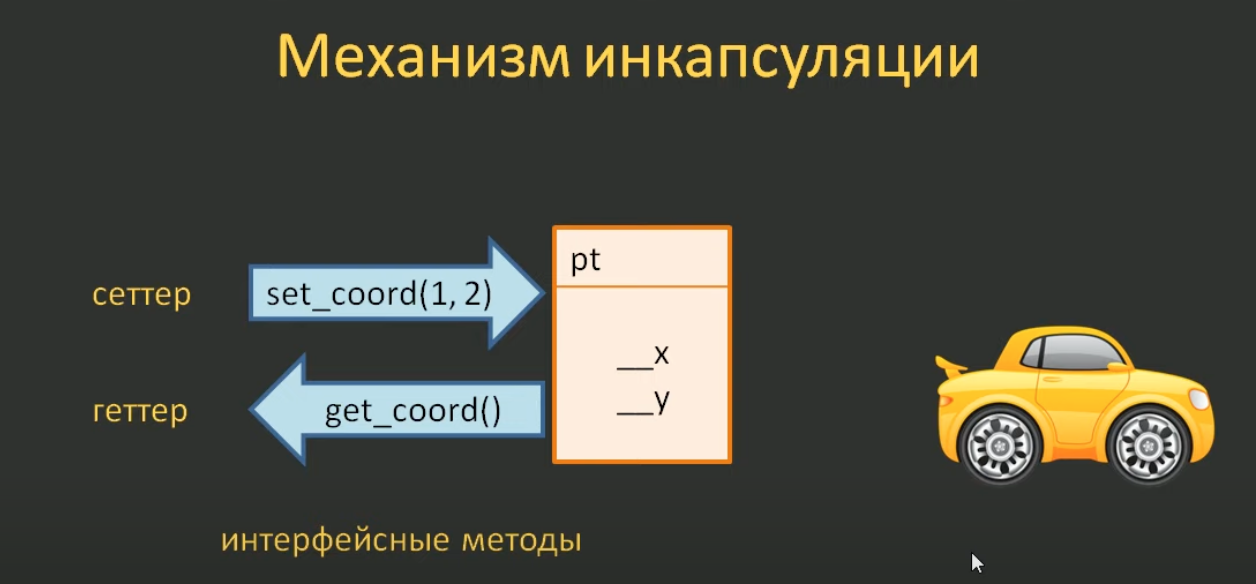

После запуска программы видим измененные координаты точки. В результате, мы с вами определили два вспомогательных метода: set_coord и get_coord, через которые предполагается работа с защищенными данными класса. Такие методы в ООП называются сеттерами и геттерами или еще интерфейсными методами.

Зачем понадобилось в классах создавать приватные атрибуты да еще и определять дополнительно методы для работы с ними извне. Мы об этом уже говорили на самом первом занятии по ООП, когда упоминали принцип инкапсуляции. 
Класс в ООП следует воспринимать как некое единое целое, и чтобы случайно или намеренно не нарушить целостность работы алгоритма внутри этого класса, то следует взаимодействовать с ним только через публичные свойства и методы. В этом суть принципа инкапсуляции. 
Опять же, представьте автомобиль, в котором согласованно работают тысячи узлов. А управление им предполагается только через разрешенные интерфейсы: руль, коробка передач, педали газа и тормоза и т.п. Если во время движения вмешиваться напрямую в его узлы, например, будем на ходу спускать воздух из шин, то, наверное, ничего хорошего не получится. То же самое, можно сказать и о программисте, который намеренно обходит запрет и обращается к скрытым атрибутам класса напрямую, а не через сеттеры или геттеры. Так делать не нужно. Вот для этого и нужны эти интерфейсные методы.

Конечно, назначение интерфейсных методов не только передавать значения между приватными атрибутами класса, но и проверять их корректность. Например, в нашем случае координаты должны быть числами. Поэтому, прежде чем обновлять значения переменных, следует проверить их тип данных. Для этого можно воспользоваться функцией type и записать сеттер следующим образом:

In [ ]:
def set_coord(self, x, y):
    if type(x) in (int, float) and type(y) in (int, float):
        self.__x = x
        self.__y = y
    else:
        raise ValueError("Координаты должны быть числами")

Здесь мы проверяем, что обе переданные переменные x и y должны иметь тип int или float и только после этого приватным атрибутам экземпляра класса присваиваются новые значения. Иначе, генерируется исключение ValueError. Об исключениях мы с вами еще будем говорить.

Теперь, если передавать недопустимые значения координат:

In [ ]:
pt.set_coord('1', 2)

то увидим ошибку ValueError.

Продолжим совершенствовать наш класс Point и добавим приватный метод для проверки корректности координат. Приватный метод объявляется также как и приватная переменная – двумя подчеркиваниями и, кроме того, сделаем его методом уровня класса, потому что он будед вызываться для конкретных координат и может быть будет обращаться к каким-то дополнительным атрибутам класса. Например, чтобы проверить, что координата x принадлежит определенному диапазону чисел и не выходит за него. Где cls - ссылка на класс Point:


In [ ]:
@classmethod
def __check_value (cls, x):
    return type(x) in (int, float)

Теперь мы можем в одном месте прописывать самые разные проверки для допустимости координат точек. Если в будущем проверка изменится, то это меняется в одной строчке. В этом преимущество такого подхода

Соответственно, в сеттере и в инициализаторе воспользуемся этим методом:

In [ ]:
def __init__(self, x=0, y=0):
    self.__x = self.__y = 0

    if self.__check_value (x) and self.__check_value (y):
        self.__x = x
        self.__y = y

def set_coord(self, x, y):
    if self.__check_value (x) and self.__check_value (y):
        self.__x = x
        self.__y = y
    else:
        raise ValueError("Координаты должны быть числами")

Теперь у нас в программе существуют приватные локальные свойства и один приватный метод __check_value

Запускаем программу и видим, что все работает. Но, при этом, доступа к этому методу извне нет, он приватный.

Таким образом можем в классах определять private или protected свойства и методы.

На самом деле, в Python можно относительно легко обратиться и к приватным атрибутам извне. Если распечатать все атрибуты экземпляра:

In [ ]:
# print(dir(pt)) # Все св-ва внутри экземпляра класса pt. см документацию
pt.__dict__

Мы увидим, следующие:

'_Point__x', '_Point__y'

Это и есть кодовые имена приватных атрибутов, к которым мы можем обратиться через ссылку pt:

In [ ]:
print(pt._Point__x, pt._Point__y)

и менять их. Однако, так делать крайне не рекомендуется и двойное подчеркивание должно сигнализировать программисту, что работать с такими атрибутами нужно только через разрешенные интерфейсные методы. Иначе, возможны непредвиденные ошибки.

Если у вас появилась необходимость лучше защитить методы класса от доступа извне, то это можно сделать с помощью модуля accessify. Для его установки нужно выполнить команду:

pip install accessify

И, затем, импортировать из него два декоратора:

In [ ]:
from accessify import private, protected

Давайте рассмотрип пример их работы.

Далее, нужный декоратор просто применяем к методу (Именно к методу это относится) и он становится либо приватным (private), либо защищенным (protected):

In [ ]:
@private
@classmethod
def check_value(cls, x):
    return type(x) in (int, float)

Все, теперь мы можем обратиться к check_value только внутри класса, но не извне. Метод становится более защищенным:

In [ ]:
pt.check_value(5)
# pt._Point__check_value(5)

После запуска, видим сообщение об ошибке

В 99% случаев используют два нижних подчеркивания. Если программист, обходит это условное соглашение, то это уже его проблемы, если что-то будет не так работать.

# 4_ Магические методы __ setattr __, __ getattribute __, __ getattr __ и __ delattr __

Теперь поговорим о работе с атрибутами класса и его экземплярами. Я напомню, что класс можно воспринимать как некое пространство имен, в котором записаны свойства и методы. Все это является атрибутами класса. Например, если вернуться к классу Point (представления точки на плоскости):

In [ ]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
 
    def __init__(self, x, y):
        self.x = x
        self.y = y
 
    def set_coord(self, x, y):
        self.x = x
        self.y = y

то здесь мы видим определение четырех атрибутов: двух свойств MAX_COORD и MIN_COORD и двух методов __init__ и set_coord. Это атрибуты класса и при создании экземпляров:

In [ ]:
pt1 = Point(1, 2)
pt2 = Point(10, 20)

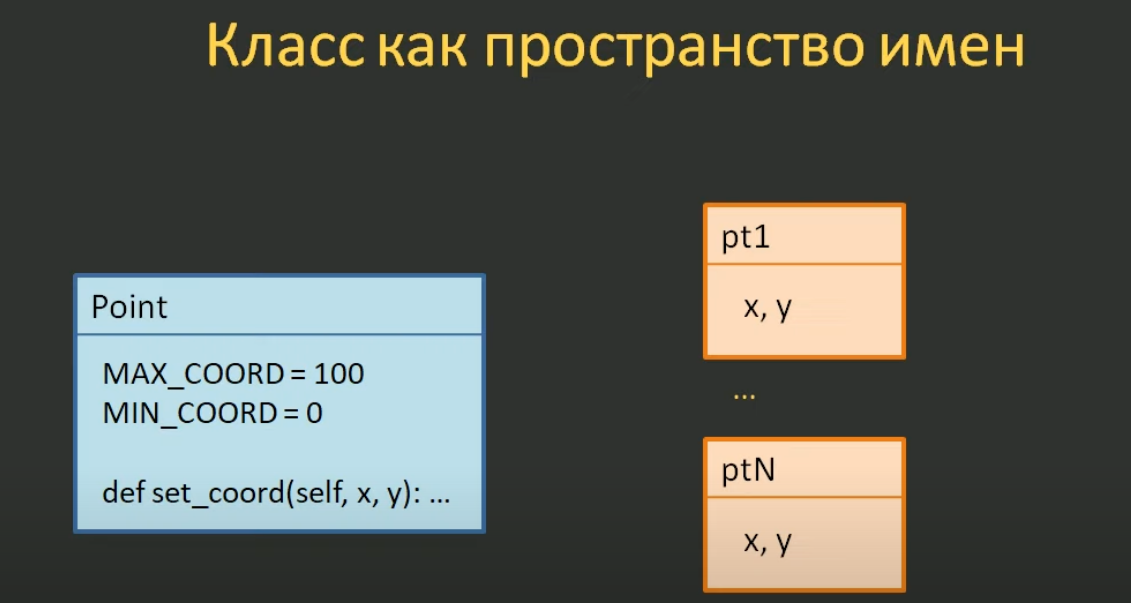

Эти атрибуты остаются в пространстве имен класса, не копируются в экземпляры. Атрибуты класса являются общими для всех его экземпляров. Из экземпляров мы можем совершенно спокойно к ним обращаться, так как пространство имен объектов содержит ссылку на внешнее пространство имен класса. Если какой-либо атрибут не существует в экземпляре, то поиск переходит во внешнее пространство, то есть, в класс и поиск продолжается там. Поэтому мы совершенно спокойно можем через экземпляр обратиться к свойству класса MAX_COORD:

In [ ]:
print(pt1.MAX_COORD)

И получается, что атрибуты и методы класса – это общие данные для всех его экземпляров.

Далее, когда мы обращаемся к атрибутам класса внутри методов, объявленных в этом классе, то должны не просто прописать их имена:

In [ ]:
def set_coord(self, x, y):
    if MIN_COORD <= x <= MAX_COORD:
        self.x = x
        self.y = y

а явно указать перед ними ссылку на класс, то есть, на пространство имен. Либо так:

In [ ]:
if Point.MIN_COORD <= x <= Point.MAX_COORD:

но лучше через ссылку экземпляра класса self, чтобы явно не указывать имя класса:

In [ ]:
if self.MIN_COORD <= x <= self.MAX_COORD:

! Чтобы обратиться к атрибутам класса внутри какого-либо метода мы должны явно указать пространство имен либо самого класса Point, либо экземпляра класса - параметр self.

Здесь self – это ссылка на экземпляр класса, из которого метод вызывается, поэтому мы можем через этот параметр обращаться к атрибутам класса.

Обо всем этом мы с вами уже говорили, я лишь еще раз повторил эти важные моменты. А теперь один нюанс, о который спотыкаются многие начинающие программисты. Давайте предположим, что нам нужен метод, который бы изменял значение атрибута класса MIN_COORD. 

Пропишем его как обычный метод:

In [ ]:
def set_bound(self, left): # left - значение атрибута min coord
    self.MIN_COORD = left # Обратимся к атрибуту через параметр self и присвоим новое значение

Иногда ошибочно здесь рассуждают так. Мы обращаемся к атрибуту класса MIN_COORD и присваиваем ему новое значение left. 

Когда мы через self (ссылку на объект) записываем имя атрибута и присваиваем ему какое-либо значение, то оператор присваивания создает этот атрибут в локальной области видимости, то есть, в самом объекте. Так работает оператор присваивания.
Если атрибут отсутствует, то он создается в текущей локальной области видимости.
В результате, у нас появляется новое локальное свойство в экземпляре класса:

Давайте вызовим метод и отобразим свойства в экземпляре pt1:

In [ ]:
pt1.set_bound(-100)
print(pt1.__dict__)

А в самом классе одноименный атрибут остается без изменений:

In [ ]:
print(Point.__dict__)

Поэтому, правильнее было бы здесь объявить метод уровня класса и через него менять значения атрибутов MIN_COORD и MAX_COORD:

In [ ]:
@classmethod
def set_bound(cls, left):
    cls.MIN_COORD = left

Тогда в самом объекте не будет создаваться никаких дополнительных свойств, а в классе изменится значение переменной MIN_COORD, так, как мы этого и хотели.

In [ ]:
pt1.set_bound(-100) # Локальный атрибут теперь не создается

Будем полагать, что мы теперь с вами хорошо понимаем, как обращаться к атрибутам класса и его объектов. Во второй части занятия я хочу вам рассказать о четырех магических методах, которые используются при работе с атрибутами:

__setattr__(self, key, value)__ – автоматически вызывается при изменении свойства key класса;
__getattribute__(self, item) – автоматически вызывается при получении свойства класса с именем item;
__getattr__(self, item) – автоматически вызывается при получении несуществующего свойства item класса;
__delattr__(self, item) – автоматически вызывается при удалении свойства item (не важно: существует оно или нет).
Работают они достаточно просто. Начнем с метода __getattribute__ и с его помощью ограничим доступ к приватным свойствам __x и __y экземпляра. Для простоты я переопределю класс Point, следующим образом:

In [ ]:
class Point:
    MAX_COORD = 100
    MIN_COORD = 0
 
    def __init__(self, x, y):
        self.x = x # self.__x
        self.y = y
 
    def __getattribute__(self, item): # ссылка на экз-р класса, item - атрибут, к которому идет обращение
        print("__getattribute__")
        return object.__getattribute__(self, item)

Здесь добавлен новый магический метод __getattribute__. Он автоматически вызывается, когда идет считывание атрибута через экземпляр класса. 
Чтобы метод отработал корректно, мы должны обратиться к классу object, от которого неявно наследуются все классы а python, и вызвать точно такой же магический метод getattribute и передать два параметра self и item (Именно в object происходит создание объекта).  Так как метод должен возвращать значение того атрибута, к которому мы обращаемся, то добавим оператор return. 
Т.е. мы переопределили магический метод getattribute. 
Как только идет обращение к какому-либо атрибуту через экземпляр класса, то срабатывает этот метод. И возвращает значение соответствующего атрибута. 
Например, при обращении к свойству MIN_COORD:

In [ ]:
print(pt1.MIN_COORD)

Или к приватному свойству через специальное имя:

In [ ]:
print(pt1._Point__x)

Или

In [ ]:
pt1 = Point(1,2)
pt2 = Point(10,20)
a = pt1.x
print(a)

Если убрать return, функция будет неявно возвращать none

Зачем может понадобиться такой метод? Давайте рассмотрим пример, где это можно использовать. Давайте запретим обращаться напрямую к атрибуту x.   
a = pt1.x

Но раз это так, то давайте явно запретим считывать такой атрибут из экземпляра класса. Для этого пропишем в методе __getattribute__ проверку:

Как только идет обращение к атрибуту через экземпляр класса, то срабатывает этот магический метод и он возвращает значение соответствубщего атрибута.

In [ ]:
def __getattribute__(self, item):
    if item == "_Point__x":
        raise ValueError("Private attribute")
    else:
        return object.__getattribute__(self, item)

То есть, мы смотрим, если идет обращение к приватному атрибуту по внешнему имени _Point__x, то генерируем исключение ValueError. И, действительно, после запуска программы видим отображение этой ошибки в консоли. Вот так, через магический метод __getattribute__ можно реализовывать определенную логику при обращении к атрибутам через экземпляр класса. 
Так мы можем через магический метод управлять обращением к тому или иному атрибуту.

Следующий магический метод __setattr__ автоматически вызывается в момент присваивания атрибуту нового значения. Пропишем формально этот метод в классе Point:

In [ ]:
def __setattr__(self, key, value): # key - имя атрибута, value - значение, которое присваивается атрибуту
    print("__setattr__")
    object.__setattr__(self, key, value)

После запуска видим несколько сообщений «__setattr__». Это связано с тем, что в момент создания экземпляров класса в инициализаторе __init__ создавались локальные свойства __x и __y. В этот момент вызывался данный метод. Также в переопределенном методе __setattr__ мы должны вызывать соответствующий метод из базового класса object, иначе, локальные свойства в экземплярах создаваться не будут.

У нас принт сработал 4 раза, так как мы дважды создавали экземпляр класса Point и в инициализаторе присваивали атрибутам определенные значения.
pt1 = Point(1,2)
pt2 = Point(10,20)

С помощью этого магического метода мы можем запретить создавать какой-либо локальный атрибут в экземплярах класса.


Давайте теперь для примера через этот магический метод запретим создание локального свойства с именем z. Сделаем это следующим образом:

In [ ]:
def __setattr__(self, key, value):
    if key == 'z': 
        raise AttributeError("недопустимое имя атрибута") # Генерируем исключение
    else:
        object.__setattr__(self, key, value) # Присваиваем атрибуту определенное значение

In [ ]:
# pt1.z = 5 # will be raise error

Следующий магический метод __getattr__ автоматически вызывается, если идет обращение к несуществующему атрибуту экземпляра класса. Добавим его в наш класс:

In [ ]:
def __getattr__(self, item):
    print("__getattr__: " + item)

Если ниже обратиться к несуществующему свойству, например:

In [ ]:
print(pt1.a)

то увидим сообщение «__getattr__: a» и значение None, которое вернул данный метод. Если же прописать существующий атрибут:

In [ ]:
print(pt1.MAX_COORD)

то этот магический метод уже не вызывается. И мы просто выводим через print атрибут в консоль. Зачем он может понадобиться? Например, нам необходимо определить класс, в котором при обращении к несуществующим атрибутам возвращается значение False, а не генерируется исключение. Для этого записывается метод __getattr__ в виде:

In [ ]:
def __getattr__(self, item):
    return False

Если бы этого метода не было. И обратились бы к несучествующему атрибуту, то возникла бы ошибка AttributeError. Если мы не хотим, чтобы не появлялась ошибка, а возвращалась какое-то нужное нам значение, то можно переопределить магический метот __ getattr __.

Наконец, последний магический метод __delattr__ вызывается в момент удаления какого-либо атрибута из экземпляра класса:

In [ ]:
def __delattr__(self, item):
    print("__delattr__: "+item)

Добавим новое локальное свойство в экземпляр pt1:

In [ ]:
pt1.a = 10

затем выполним команду его удаления:

In [ ]:
del pt1.a

и видим, что действительно был вызван метод __delattr__, правда, сам атрибут удален не был:

In [ ]:
print(pt1.__dict__)

Это из-за того, что внутри этого метода нужно вызвать соответствующий метод класса object, который и выполняет непосредственное удаление:

In [ ]:
def __delattr__(self, item):
    object.__delattr__(self, item)

Было рассмотрено, как происходит обращение к атрибутам класса и как можно управлять доступом к ним через магические методы.

https://docs.python.org/3/reference/datamodel.html#customizing-attribute-access

# Q

За что отвечает параметр cls в методах класса, объявленных следующим образом:
```Py
class Loader:
    @classmethod
    def json_parse(cls): ...
```

Ссылка на текущий метод

Ссылка на экземпляр класса, из которого вызван метод

Ссылка на класс Loader

Ссылка на базовый класс

In [ ]:
Ссылка на класс Loader

Какую роль играет приватный (private) режим доступа атрибутов классов?

скрывает приватные переменные и методы от прямого доступа к ним (по исходным именам) вне класса

защищает приватные переменные от изменений (присвоить им значение можно только один раз)

приватные атрибуты класса автоматически становятся локальными свойствами объектов этого класса

предостерегает программиста (использующего класс) от прямого использования приватных атрибутов вне класса

In [ ]:
скрывает приватные переменные и методы от прямого доступа к ним (по исходным именам) вне класса,

предостерегает программиста (использующего класс) от прямого использования приватных атрибутов вне класса

Какую роль в классах играют сеттеры и геттеры и что они из себя представляют?

это все публичные атрибуты класса или объектов, с которыми можно работать напрямую извне (классов и объектов)

это публичные методы для считывания и записи значений в приватные переменные класса или его объектов

это приватные методы для считывания и записи значений в приватные переменные класса или его объектов

сеттеры - это публичные методы класса, объявленные с декоратором @setter, а геттеры - аналогичные методы класса, объявленные с декоратором @getter

In [ ]:
это публичные методы для считывания и записи значений в приватные переменные класса или его объектов

Что в языке Python называют магическими (dunder) методами?


методы, ответчающие за создание и удаление объектов класса

методы, через которые происходит работа с атрибутами класса или объектов

любые методы с двумя нижними подчеркиваниями до и после своего имени

методы с двумя нижними подчеркиваниями до и после имени метода, которые автоматически вызываются в определенных для них ситуациях

In [ ]:
методы с двумя нижними подчеркиваниями до и после имени метода, которые автоматически вызываются в определенных для них ситуациях

Объявите класс Point так, чтобы объекты этого класса можно было создавать командами:
```Py
p1 = Point(10, 20)
p2 = Point(12, 5, 'red')
```
Здесь первые два значения - это координаты точки на плоскости (локальные свойства x, y), а третий необязательный аргумент - цвет точки (локальное свойство color). Если цвет не указывается, то он по умолчанию принимает значение black.

Создайте **тысячу** таких **объектов** с координатами (1, 1), (3, 3), (5, 5), ... то есть, с увеличением на два для каждой новой точки. Каждый объект следует поместить в список points (по порядку). Для второго объекта в списке points укажите цвет 'yellow'.

In [ ]:
class Point:
    c='black'
    def __init__(self, x, y, c):
        self.x = x
        self.y = y
        self.c = c

i=0
s=[]
k=0
for i in range (1,2003,2):
    k+=1
    pt=Point(i,i,'black')
    if k == 2:
        pt=Point(i,i,'yellow')
    print(pt.__dict__)

Объявите класс Graph, объекты которого можно было бы создавать с помощью команды:
```Py
gr_1 = Graph(data)
```
где data - список из числовых данных (данные для графика). При создании каждого экземпляра класса должны формироваться следующие локальные свойства:

data - ссылка на список из числовых данных (**у каждого объекта должен быть свой список с данными**, нужно создавать копию переданного списка); (Измените элемент списка. Только в одном экземпляре меняется значение?)
is_show - булево значение (True/False) для показа (True) и сокрытия (False) данных графика (по умолчанию True);

В этом классе объявите следующие методы:

set_data(self, data) - для передачи нового списка данных в текущий график;
show_table(self) - для отображения данных в виде строки из списка чисел (числа следуют через пробел);
show_graph(self) - для отображения данных в виде графика (метод выводит в консоль сообщение: "Графическое отображение данных: <строка из чисел следующих через пробел>");
show_bar(self) - для отображения данных в виде столбчатой диаграммы (метод выводит в консоль сообщение: "Столбчатая диаграмма: <строка из чисел следующих через пробел>");
set_show(self, fl_show) - метод для изменения локального свойства is_show на переданное значение fl_show.

Если локальное свойство is_show равно False, то методы show_table(), show_graph() и show_bar() должны выводить сообщение:

"Отображение данных закрыто"

Прочитайте из входного потока числовые данные с помощью команды:

data_graph = list(map(int, input().split()))
Создайте объект gr класса Graph с набором прочитанных данных, вызовите метод show_bar(), затем метод set_show() со значением fl_show = False и вызовите метод show_table(). На экране должны отобразиться две соответствующие строки.

Sample Input:
8 11 10 -32 0 7 18
Sample Output:
Столбчатая диаграмма: 8 11 10 -32 0 7 18
Отображение данных закрыто

In [ ]:
# здесь объявляются все необходимые классы


# считывание списка из входного потока (эту строку не менять)
data_graph = list(map(int, input().split()))
#data_graph = [8, 11, 10, -32, 0, 7, 18]

# здесь создаются объекты классов и вызываются нужные методы

# Answers

За что отвечает параметр cls в методах класса, объявленных следующим образом:

Ссылка на класс Loader

Какую роль играет приватный (private) режим доступа атрибутов классов?

скрывает приватные переменные и методы от прямого доступа к ним (по исходным именам) вне класса

предостерегает программиста (использующего класс) от прямого использования приватных атрибутов вне класса

Какую роль в классах играют сеттеры и геттеры и что они из себя представляют?

это публичные методы для считывания и записи значений в приватные переменные класса или его объектов

Что в языке Python называют магическими (dunder) методами?

методы с двумя нижними подчеркиваниями до и после имени метода, которые автоматически вызываются в определенных для них ситуациях